In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### Reading Dataset(.csv file)

In [153]:
pd.set_option('display.max_columns', 89)
df = pd.read_csv("data.csv", index_col=0)
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3

#### Check for duplicate ROWS 

In [154]:
df[df.duplicated()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


## Ques 1: Which clubs are the most economical? How did you decide that?

### My opinion on how to call a club Economical based on given dataset is by checking how much they are paying ('Wage') for average potential of players in particular Club. 

##### Checking for NaN values in Dataset

In [186]:
df.isna().sum(axis = 0)

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

#### Dropping the players who dont play for any Club

In [205]:
_1 = df
q_1 = df.dropna(subset = ['Club'])

In [206]:
q_1.isna().sum(axis = 0).head(30)

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                            0
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       48
Jersey Number                  48
Joined                       1312
Loaned From                 16702
Contract Valid Until           48
Height                         48
Weight                         48
LS                           2040
ST                           2040
RS            

In [207]:
q_1.groupby(['Club']).mean().Overall
q_1['Wage'] = q_1['Wage'].apply(lambda x: np.float64(x.replace('K','').replace('€','')))
# q_1['Wage'] = q_1['Wage'].apply(lambda x: np.float64(x.))
q_1 = q_1.groupby('Club').agg({'Wage': 'sum', 'Overall': 'mean'})
q_1['Overall/Wage'] = q_1['Overall']/q_1['Wage']
q_1.sort_values(by = 'Overall/Wage', ascending = False, inplace = True)
q_1

/home/urg/miniconda3/envs/urg_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Wage,Overall,Overall/Wage
Club,,,
Sligo Rovers,19.0,56.631579,2.980609
Derry City,19.0,55.777778,2.935673
Viktoria Plzeň,24.0,69.416667,2.892361
Limerick FC,19.0,54.526316,2.869806
Shamrock Rovers,22.0,60.090909,2.731405
...,...,...,...
Chelsea,3249.0,76.787879,0.023634
Manchester United,3391.0,77.242424,0.022779
Manchester City,3741.0,76.727273,0.020510


## Ques 2: What is the relationship between age and individual potential of the player? How does age influence the players' value? At what age does the player exhibit peak pace ?

<AxesSubplot:>

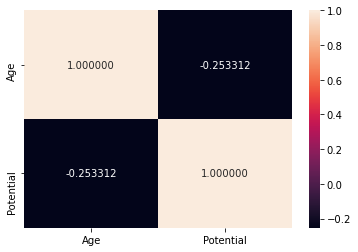

In [160]:
q_2 = df
sns.heatmap(q_2[['Age','Potential']].corr(method= 'pearson'), annot=True, fmt="f")

#### Relationship between Age and Potential of player negative correlation shows both are inversely proportional.

In [161]:
def con_val (x):
    try:
        return np.float(x.replace('K','').replace('€',''))/1000
    except:
        return np.float(x.replace('M','').replace('€',''))
q_2['Value'] = q_2['Value'].apply(con_val)

<AxesSubplot:>

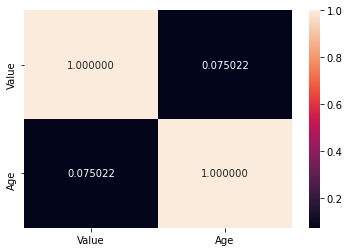

In [162]:
sns.heatmap(q_2[['Value','Age']].corr(method= 'pearson'), annot=True, fmt="f")

#### Age and Value of a player are weakly related to each other as shown in the Correlation Heatmap.

In [163]:
q_2.groupby(['Age']).mean()['SprintSpeed'].sort_values(ascending = False).head()

Age
25    67.905488
24    67.599262
23    67.428894
26    67.345876
27    67.131261
Name: SprintSpeed, dtype: float64

#### Mean Speed of player at a particular age group 

## Ques 3: What skill sets are helpful in deciding a player's potential? How do the traits contribute to the players' potential?

In [167]:
q_3 = df
q_3 = q_3.dropna(subset = ['Club'])
# q_3.isna().sum().head(20)
q_3 = q_3.dropna(subset = ['Preferred Foot'])
q_3.reset_index(drop = True, inplace = True)

### What I considered for solving the question.
#### Skills: Gameplay Skills
#### Traits: Physical Traits

In [168]:
var_target = ['Potential']
var_traits = ['Special' , 'Skill Moves' , 'Weak Foot' , 'Work Rate' , 'Body Type' , 'Height', 'Weight', 'Age']
var_skills = ['Crossing' , 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

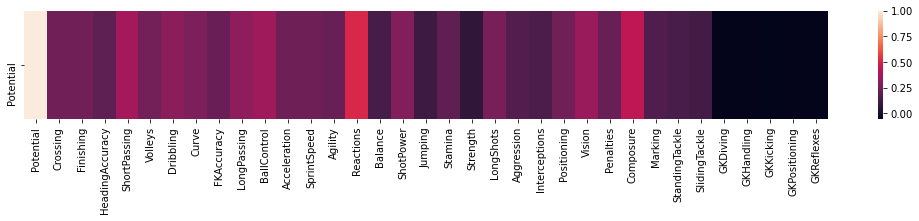

,Potential
Reactions,0.513877
Composure,0.440228
ShortPassing,0.369530
BallControl,0.355262
Vision,0.348128
LongPassing,0.321262
Dribbling,0.315910
ShotPower,0.288771
Curve,0.279425
LongShots,0.266765


In [172]:
X_q3_1_corr = q_3.loc[:,var_target + var_skills]
X_q3_1 = q_3.loc[:,var_skills]
Y_q3_1 = q_3.loc[:,var_target]
top = 10
plt.figure(figsize = (18,2))
sns.heatmap(X_q3_1_corr.corr(method= 'pearson')[['Potential']].T)
plt.show()
X_q3_1_corr.corr(method= 'pearson').sort_values(['Potential'], ascending = False)[['Potential']].iloc[1:top+1,0:]

#### Above are Top skills to contribute towards player Potential.

#### Simple Linear Regression Model showing skills with highest coefficient.

In [173]:
top = 5
c = np.array(list(X_q3_1.columns))
scaler = StandardScaler()
X_q3_1 = scaler.fit_transform(X_q3_1)
reg = LinearRegression().fit(X_q3_1, Y_q3_1)
print("Important Skills according to Lin. Regression model\n",c[np.argsort(-np.abs(reg.coef_))][0][0:top])

Important Skills according to Lin. Regression model
 ['BallControl' 'Dribbling' 'ShortPassing' 'Reactions' 'Crossing']


### Preprocessing for Object dtype columns

In [175]:
X_q3_2_corr = q_3.loc[:,var_target+var_traits]
X_q3_2 = q_3.loc[:,var_traits]
Y_q3_2 = q_3.loc[:,var_target]

top = 7
my_dict = {'Messi': 9,
           'C. Ronaldo': 10, 
           'Neymar': 8, 
           'Lean': 9, 
           'Normal': 7,
           'Courtois': 7,
           'Stocky': 6, 
           'PLAYER_BODY_TYPE_25' : 1, 
           'Shaqiri' : 8, 
           'Akinfenwa' : 6}
X_q3_2['Weight'] = q_3['Weight'].apply(lambda x: np.float64(x.replace('lbs','')))
X_q3_2['Body Type'] = q_3['Body Type'].apply(lambda x: my_dict.get(x))
X_q3_2_corr['Weight'] = q_3['Weight'].apply(lambda x: np.float64(x.replace('lbs','')))
X_q3_2_corr['Body Type'] = q_3['Body Type'].apply(lambda x: my_dict.get(x))

In [176]:
enc = OneHotEncoder(handle_unknown='ignore')
X = X_q3_2[['Work Rate']].values
enc.fit(X)
temp_X = enc.transform(X)
temp_X.toarray()
temp_df = pd.DataFrame(data = temp_X.toarray(), columns = enc.categories_)
X_q3_2.drop(['Work Rate'], axis = 1, inplace = True)
X_q3_2_corr.drop(['Work Rate'], axis = 1, inplace = True)

X_q3_2 = pd.concat([X_q3_2,temp_df], axis=1)
X_q3_2_corr = pd.concat([X_q3_2_corr,temp_df], axis=1)

def con_height (row):
        h = [int(i) for i in str(row).split("'")]
        return 12*h[0] + h[1]
    
X_q3_2['Height'] = X_q3_2['Height'].apply(con_height)
X_q3_2_corr['Height'] = X_q3_2_corr['Height'].apply(con_height)

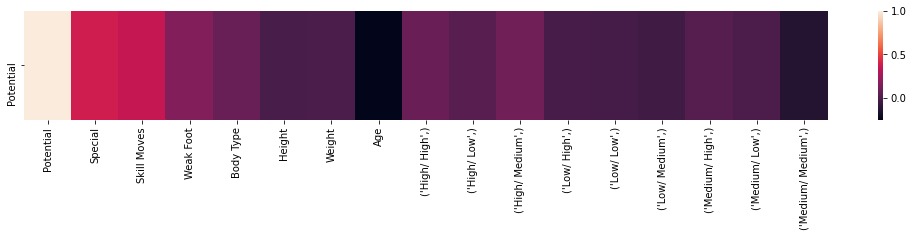

,Potential
Special,0.384714
Skill Moves,0.354908
Weak Foot,0.161411
"(High/ Medium,)",0.105128
"(High/ High,)",0.087614
Body Type,0.084008
"(High/ Low,)",0.036786


In [177]:
plt.figure(figsize = (18,2))
sns.heatmap(X_q3_2_corr.corr(method= 'pearson')[['Potential']].T)
plt.show()
X_q3_2_corr.corr(method= 'pearson').sort_values(['Potential'], ascending = False)[['Potential']].iloc[1:top+1,0:]

#### Above are Top traits contribute towards player Potential.

#### Simple Linear Regression Model showing traits with highest coefficient.

In [178]:
top = 5
c = np.array(list(X_q3_2.columns))
scaler = StandardScaler()
X_q3_2 = scaler.fit_transform(X_q3_2)
reg = LinearRegression().fit(X_q3_2, Y_q3_2)
print("Important traits according to Lin. Regression model\n",c[np.argsort(-np.abs(reg.coef_))][0][0:top])

Important traits according to Lin. Regression model
 ['Special' 'Age' 'Weight' 'Height' 'Skill Moves']


/home/urg/miniconda3/envs/urg_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


## Ques 4: Which features directly contribute to the wages of the players?

In [44]:
q_4 = df
q_4 = q_4.dropna(subset = ['Club'])
# q_3.isna().sum().head(20)
q_4 = q_4.dropna(subset = ['Preferred Foot'])
q_4.reset_index(drop = True, inplace = True)

In [45]:
var_target = ['Wage']
var_features = ['Overall', 'Potential','Special' , 'Skill Moves' , 'Weak Foot' , 'Work Rate' , 'Body Type' , 'Height', 'Weight', 'Age', 
              'Crossing' , 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'International Reputation']

In [46]:
X_q4 = q_4.loc[:,var_target + var_features]

### Preprocessing for object dtype columns

In [47]:
my_dict = {'Messi': 9,
           'C. Ronaldo': 10, 
           'Neymar': 8, 
           'Lean': 9, 
           'Normal': 7,
           'Courtois': 7,
           'Stocky': 6, 
           'PLAYER_BODY_TYPE_25' : 1, 
           'Shaqiri' : 8, 
           'Akinfenwa' : 6}
X_q4['Weight'] = X_q4['Weight'].apply(lambda x: np.float64(x.replace('lbs','')))
X_q4['Body Type'] = X_q4['Body Type'].apply(lambda x: my_dict.get(x))
enc = OneHotEncoder(handle_unknown='ignore')
X = X_q4[['Work Rate']].values
enc.fit(X)
temp_X = enc.transform(X)
temp_X.toarray()
temp_df = pd.DataFrame(data = temp_X.toarray(), columns = enc.categories_)
X_q4.drop(['Work Rate'], axis = 1, inplace = True)
X_q4 = pd.concat([X_q4,temp_df], axis=1)
def con_height (row):
        h = [int(i) for i in str(row).split("'")]
        return 12*h[0] + h[1]
    
X_q4['Height'] = X_q4['Height'].apply(con_height)
X_q4['Wage'] = q_4['Wage'].apply(lambda x: np.float64(x.replace('K','').replace('€','')))


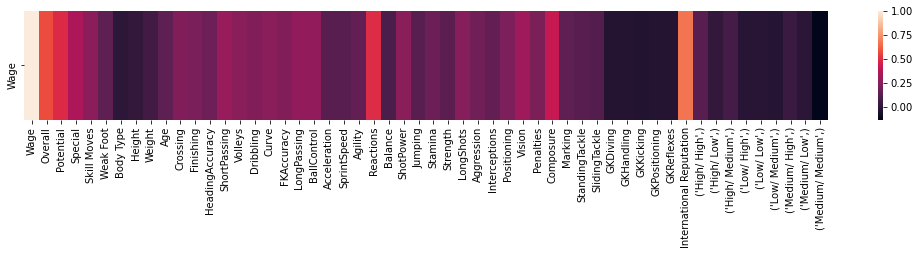

,Wage
International Reputation,0.670736
Overall,0.575940
Reactions,0.499564
Potential,0.488999
Composure,0.423256
Special,0.350178
Vision,0.317034


In [48]:
plt.figure(figsize = (18,2))
sns.heatmap(X_q4.corr(method= 'pearson')[['Wage']].T)
plt.show()
top = 7
X_q4.corr(method= 'pearson').sort_values(['Wage'], ascending = False)[['Wage']].iloc[1:top+1,0:]

#### Above features directly contribute towards players wages.

## Ques 5: What is the age distribution in different clubs? Which club has most players young?

In [129]:
q_5 = df
q_5 = q_5.dropna(subset = ['Club'])
# q_3.isna().sum().head(20)
q_5 = q_5.dropna(subset = ['Preferred Foot'])
q_5.reset_index(drop = True, inplace = True)
q_5 = q_5.groupby('Club').agg({'Age': lambda x: ','.join([str(i) for i in list(x.values)])})
q_5.reset_index(inplace = True)
Threshold = df.Age.mean()
q_5['Count of Young Players'] = q_5['Age'].apply(lambda x: (np.array([int(i) for i in x.split(',')])<Threshold).sum())

### Sorted the Clubs based on most number of Young Players(young threshold = mean(all_age)).

In [143]:
q_5.sort_values(['Count of Young Players'], ascending = False, inplace = True)
q_5.reset_index(drop = True, inplace = True)
q_5

,Club,Age,Count of Young Players
0,Barnsley,"25,23,25,24,25,23,23,25,22,25,24,25,23,23,25,2...",28
1,FC Sochaux-Montbéliard,"24,26,20,24,22,20,21,23,20,25,20,22,24,22,28,2...",26
2,RC Celta,"30,21,27,23,23,31,24,24,25,24,22,32,27,26,22,3...",26
3,Envigado FC,"22,29,21,23,23,25,24,23,21,23,21,25,23,21,20,2...",26
4,Chamois Niortais Football Club,"32,24,23,27,22,18,19,22,24,22,23,22,24,19,22,3...",25
...,...,...,...
646,Sport Club do Recife,"30,34,26,34,26,30,26,30,30,34,34,26,34,30,34,2...",0
647,Fluminense,"30,34,30,26,34,34,34,26,26,34,26,34,30,26,34,3...",0
648,Grêmio,"26,26,30,30,34,30,30,34,26,26,30,34,30,26,30,2...",0
649,Paraná,"30,26,34,34,34,34,34,30,30,34,30,34,34,26,26,2...",0


In [144]:
lst = []
lst1 = []
lst = list(q_5['Age'])
for i in range(0, len(lst)):
    lst1.append(lst[i].split(','))
for i in range(0, len(lst1)):
    for j in range(0, len(lst1[i])):
        lst1[i][j] = int(lst1[i][j])
#     lst2.append(i)

#### Since there are 651 total clubs its hard to show distribution for all clubs. Therefore, from all clubs plotting age distribution of 7 club from most young to least young.

<Figure size 1296x720 with 0 Axes>

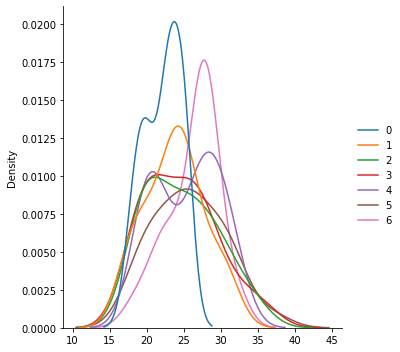

In [147]:
lst2 = []
i = 0
while(i<650):
    lst2.append(lst1[i])
    i += 100
plt.figure(figsize = (18,10))
sns.displot(lst2, kind = 'kde')
plt.show()